# Planar flows

This notebook is very much a work in progress, but is aimed to be an introduction to normalising flows, here exemplified by the planar flow. This is often one of the first normalising flows that newcomers to the field are introduced to, as the planar flow is described in the (by now) classic paper [*Normalizing Flows for Variational Inference*](https://arxiv.org/pdf/1505.05770.pdf) by D. Rezende and S. Mohamed.

The planar flow also serves well for building intuition about normalising flows, as it is very suitable for visualising how a normalising flow transforms the base density by repeatedly applying simple transformations of the (in this case) two-dimensional space. 

In [1]:
# General imports.
import torch
import torch.nn
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
# Planar flow imports. 
from planar_flow import PlanarFlow
from target_distribution import TargetDistribution
from loss import VariationalLoss
from utils.gif import make_gif_from_train_plots
from utils.plot import plot_training, plot_density, plot_available_distributions, plot_comparison

C:\Users\yujit\AppData\Local\Continuum\anaconda3\envs\nflows\lib\site-packages\numpy\__init__.py:148: UserWarning: mkl-service package failed to import, therefore Intel(R) MKL initialization ensuring its correct out-of-the box operation under condition when Gnu OpenMP had already been loaded by Python process is not assured. Please install mkl-service package, see http://github.com/IntelPython/mkl-service
  from . import _distributor_init


ImportError: 

IMPORTANT: PLEASE READ THIS FOR ADVICE ON HOW TO SOLVE THIS ISSUE!

Importing the numpy C-extensions failed. This error can happen for
many reasons, often due to issues with your setup or how NumPy was
installed.

We have compiled some common reasons and troubleshooting tips at:

    https://numpy.org/devdocs/user/troubleshooting-importerror.html

Please note and check the following:

  * The Python version is: Python3.9 from "C:\Users\yujit\AppData\Local\Continuum\anaconda3\envs\nflows\python.exe"
  * The NumPy version is: "1.21.5"

and make sure that they are the versions you expect.
Please carefully study the documentation linked above for further help.

Original error was: DLL load failed while importing _multiarray_umath: The specified module could not be found.


C:\Users\yujit\OneDrive\ドキュメント\github\planar-flows\utils\plot.py:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(X, Y, U, cmap=cmap, rasterized=True)


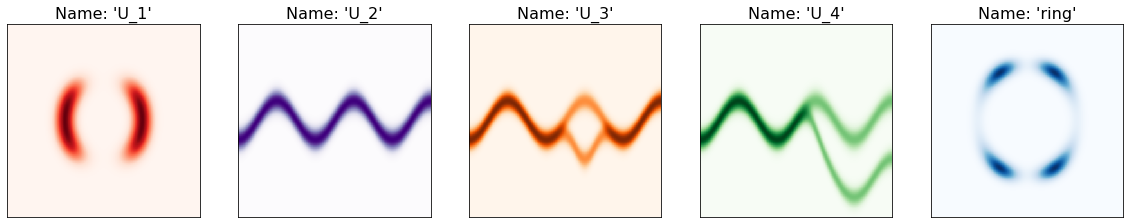

In [3]:
# Plot available distributions.
plot_available_distributions()

In [4]:
# Parameters.
target_distr = "normal"  # The distribution we want to learn. Choices: ["U_1", "U_2", "U_3", "U_4", "ring"].
flow_length = 32  # Number of transformations in the flow. 
num_batches = 5000  # How many training batches to train for. These are generated on the fly. 
batch_size = 128  # This is... wait for it... the size of each batch. 
lr = 6e-4  # The learning rate for the optimiser.
axlim = 7  # Setting for plotting. Recommended: 5 for 'U_1' to 'U_4', 7 for 'ring'.

In [5]:
# Initialise model, loss, and optimiser. 
model = PlanarFlow(dim=2, K=flow_length)
density = TargetDistribution(target_distr)
bound = VariationalLoss(density)
optimiser = torch.optim.Adam(model.parameters(), lr=lr)

In [7]:
# Train model. 
for batch_num in range(1, num_batches + 1):
    # Get batch from N(0,I).
    batch = torch.zeros(size=(batch_size, 2)).normal_(mean=0, std=1)
    # Pass batch through flow.
    zk, log_jacobians = model(batch)
    # Compute loss under target distribution.
    loss = bound(batch, zk, log_jacobians)
    
    # Train. 
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

    if batch_num % 1000 == 0:
        print(f"(batch_num {batch_num:05d}/{num_batches}) loss: {loss}")

    if batch_num == 1 or batch_num % 100 == 0:
        # Save plots during training. Plots are saved to the 'train_plots' folder.
        plot_training(model, flow_length, batch_num, lr, axlim)

(batch_num 01000/5000) loss: -0.05452755093574524
(batch_num 02000/5000) loss: -1.4903115034103394
(batch_num 03000/5000) loss: -1.8581246137619019
(batch_num 04000/5000) loss: -1.8121509552001953
(batch_num 05000/5000) loss: -1.8638114929199219


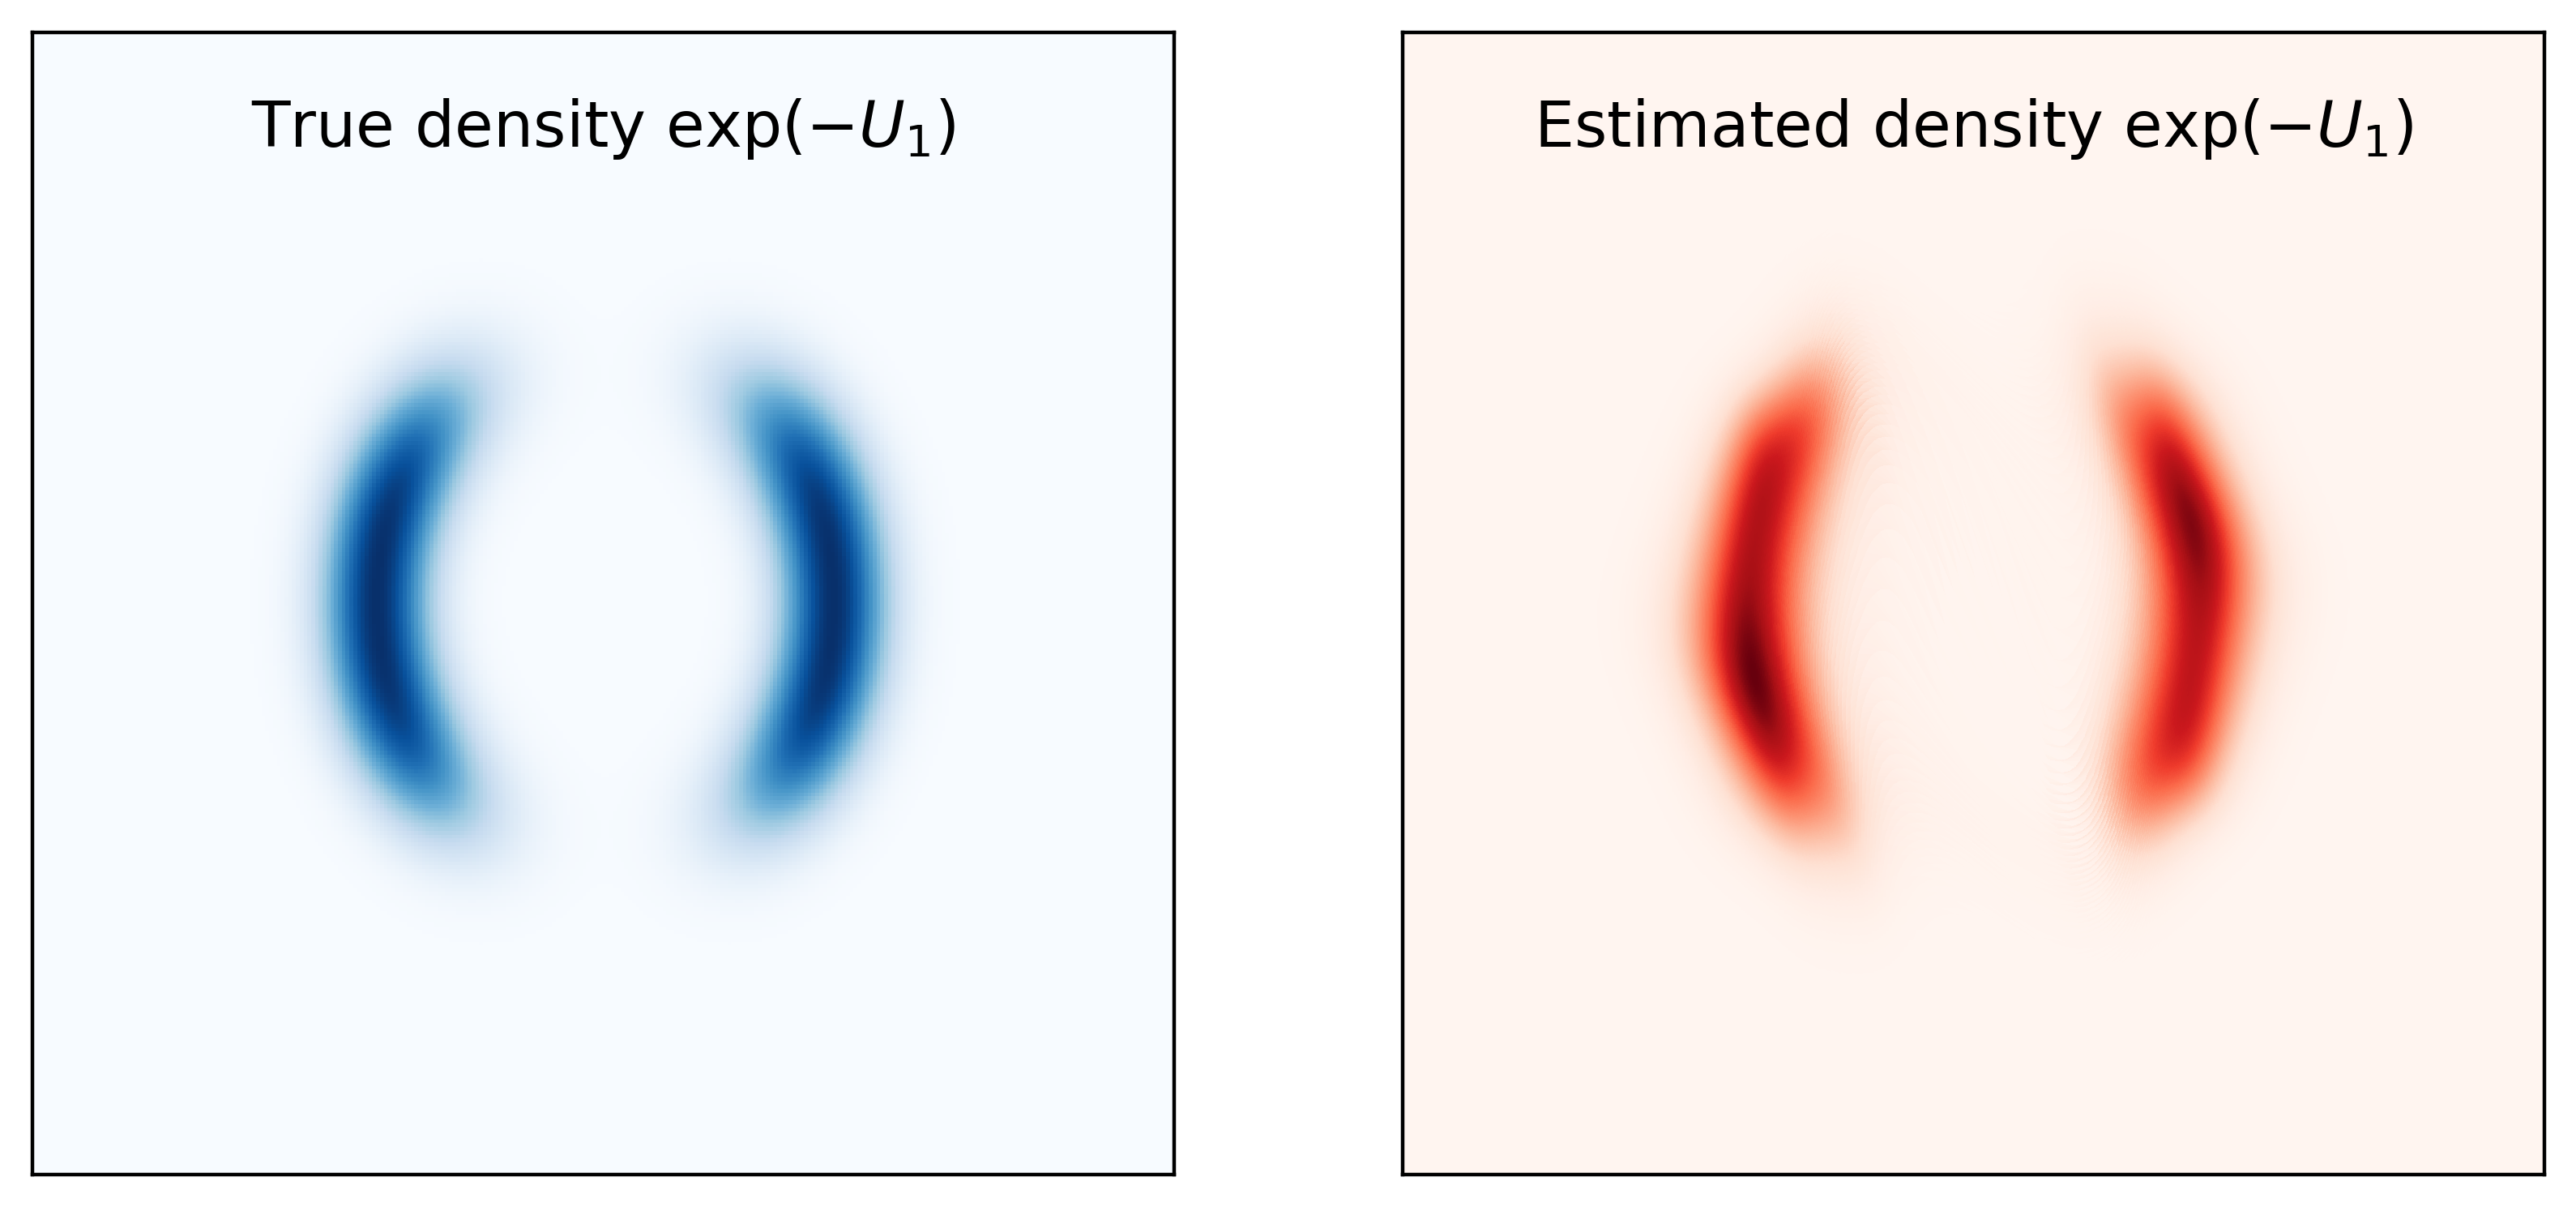

In [8]:
# Plot true and estimated denisty side by side. 
plot_comparison(model, target_distr, flow_length)

In [9]:
# Generate and display an animation of the training progress.
make_gif_from_train_plots('notebook.gif')
display(Markdown('<img src="gifs/notebook.gif" width="400">')) # Ugly 🤮

<img src="gifs/notebook.gif" width="400">